# Exploratory analysis & Outlier detection for Socio Economic Part



## 1. Importing modules

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 2. Loading data

This dataset contains info obtained from Aquastat and UNICEF. We are going to analyze the following variables:

   * HDI
   * Population growth
   * Life expectancy
   * Mortality rate
   * GDP
   * The ratio of rural over urban population
   * The proportion of rural population with access to clean water
    

In [41]:
df = pd.read_csv('clean data/socioec_factors.csv', index_col=0)
df.sample(5)

,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [highest = 1] (-),Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to safe drinking-water (JMP) (%),Total population with access to safe drinking-water (JMP) (%),Urban population (1000 inhab),Urban population with access to safe drinking-water (JMP) (%),DEC alternative conversion factor (LCU per US$),...,"Mortality rate, infant (per 1,000 live births)","Official exchange rate (LCU per US$, period average)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Population aged 25-64 years (thousands),Population growth (annual %),"Prevalence of HIV, total (% of population ages 15-49)",Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI),Total population (thousands)
17,BOL,3393.959523,0.700,10.188475,3417.155,75.6,90.0,7634.445,96.7,6.90,...,25.2,6.90,2.914,2.72,4526.4,1.500,0.20,0.40,2.62,10868.8
47,GAB,7372.081131,0.700,7.714062,223.245,66.7,93.2,1801.892,97.2,550.44,...,35.6,550.44,298.670,332.14,798.4,3.300,3.84,0.54,4.26,1944.4
35,DJI,2891.234525,0.492,40.693922,213.906,64.7,90.0,743.079,97.4,177.70,...,54.2,177.70,103.542,104.06,417.4,1.660,1.12,0.60,2.00,913.8
81,MDA,2386.876265,0.709,119.931581,2327.145,81.4,88.4,1724.067,96.9,16.76,...,13.4,16.76,5.364,6.22,2429.4,-0.925,0.68,0.34,5.26,4069.0
77,LTU,16521.107737,0.866,43.583831,938.898,90.4,96.6,1951.399,99.7,0.86,...,4.0,2.60,0.442,0.50,1583.4,-1.100,0.16,0.54,NaN,2929.4


In [42]:
df.rename(columns = {#'country':'Country',
                     'Human Development Index (HDI) [highest = 1] (-)': 'HDI',
                     'Rural population (1000 inhab)' : 'rural_pop',
                     'Urban population (1000 inhab)' : 'urban_pop',
                     'Rural population with access to safe drinking-water (JMP) (%)' : 'rural_water',
                     'Urban population with access to safe drinking-water (JMP) (%)' : 'urban_water',
                     'Life expectancy at birth, total (years)':'life_ex', 
                     'Mortality rate, infant (per 1,000 live births)': 'mort_rate', 
                     'Population growth (annual %)': 'pop_growth',
                     'GDP per capita, PPP (constant 2011 international $)': 'GDP_pcp' }, inplace = True)
df.sample(5)

,Country,GDP per capita (current US$/inhab),HDI,Population density (inhab/km2),rural_pop,rural_water,Total population with access to safe drinking-water (JMP) (%),urban_pop,urban_water,DEC alternative conversion factor (LCU per US$),...,mort_rate,"Official exchange rate (LCU per US$, period average)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Population aged 25-64 years (thousands),pop_growth,"Prevalence of HIV, total (% of population ages 15-49)",Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI),Total population (thousands)
63,IRQ,4980.948425,0.684,86.317914,11375.936,70.1,86.6,26898.682,93.8,1172.66,...,24.6,1173.06,556.034,545.40,13194.6,3.26,NaN,0.50,NaN,35461.0
127,TTO,16415.405480,0.799,269.797076,640.679,95.1,95.1,728.446,95.1,6.54,...,17.8,6.54,4.240,4.36,767.4,0.58,0.92,0.66,NaN,1369.6
75,LBY,3940.670630,0.704,3.740025,1286.565,68.3,71.2,5088.051,72.1,1.36,...,11.4,1.36,0.570,0.54,3198.0,0.92,0.20,0.44,NaN,6434.6
134,UZB,1853.925426,0.707,71.434477,15779.684,80.9,87.3,16130.957,98.5,3010.62,...,20.4,3010.62,1082.220,1154.00,14902.6,1.68,0.18,0.38,1.70,30938.2
2,ALB,4445.132198,0.789,104.008979,1190.155,95.2,95.1,1740.032,94.9,116.08,...,8.6,116.08,42.746,53.14,1485.4,-0.20,0.10,0.34,5.74,2892.2


In [43]:
# create new features
df['r_u'] = df['rural_pop']/df['urban_pop']
df['r_u_access'] = df['rural_water']/df['urban_water']

In [44]:
df_ws = pd.read_csv('clean data/water_stress.csv')
df_ws = df_ws.rename(columns = {'Water stress (MDG)' :
                                            'stress', 'Water use efficiency (SDG)' : 'efficiency'})
df_ws =df_ws.drop(['Water stress (SDG)'], axis = 1)
df_ws.sample(5)

,Unnamed: 0,Country,stress,efficiency
37,37,CPV,8.433333,51.273833
89,89,KOR,41.889527,52.445010
72,72,HUN,4.325962,23.880203
179,179,ZWE,16.695000,5.213329
175,175,VNM,9.259150,2.349448


In [45]:
# merge aquastat with water stress. 
# left merge to only keep aquastat countries
df_piv_ws = pd.merge(df, df_ws, on=["Country"], how='left')
df_piv_ws.sample(5)

,Country,GDP per capita (current US$/inhab),HDI,Population density (inhab/km2),rural_pop,rural_water,Total population with access to safe drinking-water (JMP) (%),urban_pop,urban_water,DEC alternative conversion factor (LCU per US$),...,pop_growth,"Prevalence of HIV, total (% of population ages 15-49)",Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI),Total population (thousands),r_u,r_u_access,Unnamed: 0,stress,efficiency
129,TUR,10560.021540,0.805,103.287006,20473.563,100.0,100.0,60271.457,100.0,2.68,...,1.66,NaN,0.46,7.78,78525.4,0.339689,1.000000,166.0,28.360113,13.603153
51,GMB,716.451019,0.459,195.919381,827.654,84.4,90.2,1272.914,94.2,42.30,...,3.00,1.90,0.30,3.06,2087.4,0.650204,0.895966,62.0,1.270000,10.360881
49,GHA,2046.043362,0.591,122.082104,12857.864,84.0,88.7,15975.765,92.6,3.38,...,2.26,1.80,0.38,2.22,27856.8,0.804836,0.907127,60.0,2.577580,27.577535
58,HUN,14556.367247,0.841,104.588015,2813.212,100.0,100.0,6908.347,100.0,258.30,...,-0.28,NaN,0.54,NaN,9780.0,0.407219,1.000000,72.0,4.325962,23.880203
130,TZA,954.877401,0.522,57.701192,38367.191,45.5,55.6,18942.828,77.2,1929.64,...,3.00,5.06,0.42,0.92,51527.2,2.025420,0.589378,167.0,5.384855,6.915170


In [46]:
#final dataset 

df1 = df_piv_ws[['Country', 'HDI', 'r_u', 'r_u_access', 'pop_growth','mort_rate','life_ex','GDP_pcp']]
df1.head()

,Country,HDI,r_u,r_u_access,pop_growth,mort_rate,life_ex,GDP_pcp
0,AFG,0.493,2.960340,0.601023,3.06,53.2,63.4,2226.0
1,AGO,0.576,0.542292,0.374005,3.44,58.6,59.2,7859.4
2,ALB,0.789,0.683985,1.003161,-0.20,8.6,78.0,12227.4
3,ARE,0.864,0.159447,1.004016,0.74,7.0,77.2,64243.0
4,ARG,0.832,0.089930,1.010101,1.08,10.2,76.0,23732.2


In [47]:
df_tmp = df1.copy()

## 3. Exploratory analysis

In this section we are going to inspect the behaviour of each variable and the relationship between them, below we present the univariate and bivariate descriptive statistics

### 3.1 Univariate exploratory analysis

#### 3.1.1  Checking the distribution per indicator

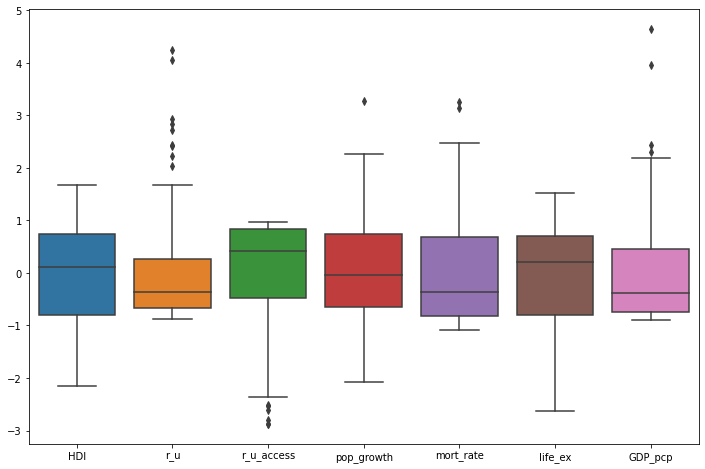

In [53]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df_tmp)
plt.show()

- From the previous boxplots, we can see there are some outliers in the proportion of rural over urban population ( _r-u_ ), the proportion of the rural population with access to safe drinking water(_ru-access_) and _GDP_ . Also, few cases on pop_growth and mort_rate. We will explore this in more depth afterwards.

In [49]:
df_tmp.describe()

,HDI,r_u,r_u_access,pop_growth,mort_rate,life_ex,GDP_pcp
count,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000,138.000000
mean,0.700057,1.177456,0.859069,1.557801,24.612766,71.188571,18407.337681
std,0.152312,1.346868,0.169591,1.281321,20.820144,7.761768,19907.620317
min,0.373000,0.000000,0.372727,-3.600000,2.000000,50.800000,831.400000
25%,0.577000,0.260017,0.777436,0.740000,7.800000,65.450000,3886.000000
50%,0.717000,0.683985,0.930000,1.400000,17.400000,72.500000,11108.900000
75%,0.813000,1.539356,1.000000,2.500000,38.800000,76.300000,27180.850000
max,0.953000,6.870257,1.024084,5.740000,92.200000,83.000000,110631.000000


#### 3.1.2 Distribution of each indicator per country

First, we standardize the variables to explore the relationship between them. 

In [50]:
# transform variables (std) before heatmap
scaler = StandardScaler()
# get numeric data
num_d = df_tmp.drop(["Country"], axis =1)

In [51]:
# update the cols with their normalized values
df_tmp[num_d.columns] = scaler.fit_transform(num_d)

- Here I am removing some NA...but this should come clean from preproc..

In [52]:
print(df_tmp.isna().sum(axis=0))
df_tmp = df_tmp.dropna(axis=0)

Country       0
HDI           0
r_u           0
r_u_access    0
pop_growth    0
mort_rate     0
life_ex       1
GDP_pcp       3
dtype: int64


<AxesSubplot:ylabel='Country'>

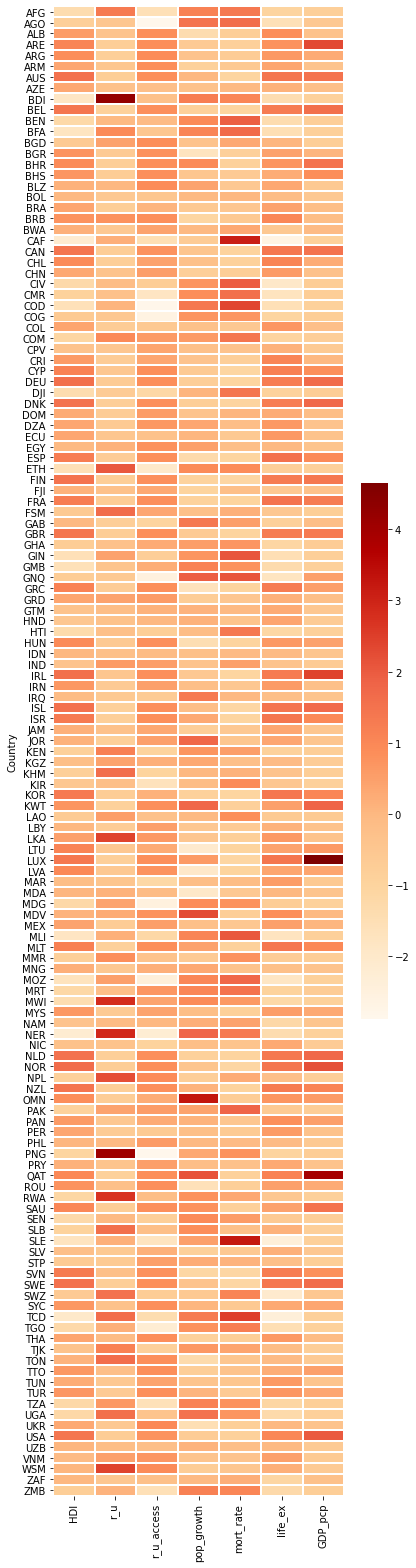

In [22]:
df_tmp.set_index(['Country'],inplace=True) #setting index so heatmap can be plotted
plt.subplots(figsize=(6,.2*(len(df_tmp.index))))
sns.heatmap(df_tmp,      
            cbar_kws={'fraction' : 0.08}, # shrink colour bar
            cmap='OrRd', # use orange/red colour map
            linewidth=1)

- From above we can see that the outliers from GDP are countries like QAT, LUX, ARE, IRL ...
- PNG & BDI have high ratio of rural pop (r_u)
- OMN QAT MDV have high pop growth 
- SLE, CAF, TCD have large mort_rate

### 3.2 Bivariate Analysis

#### 3.2.1 Checking the correlation between variables

<AxesSubplot:>

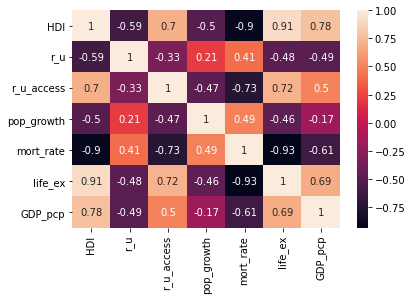

In [23]:
corr_data = df_tmp.corr()
sns.heatmap(corr_data,annot=True)

- The heatmap shows that the mortality rate is highly negatively correlated with HDI (-0.9) and life_ex (-0.93). HDI is highly correlated with the life expectancy.

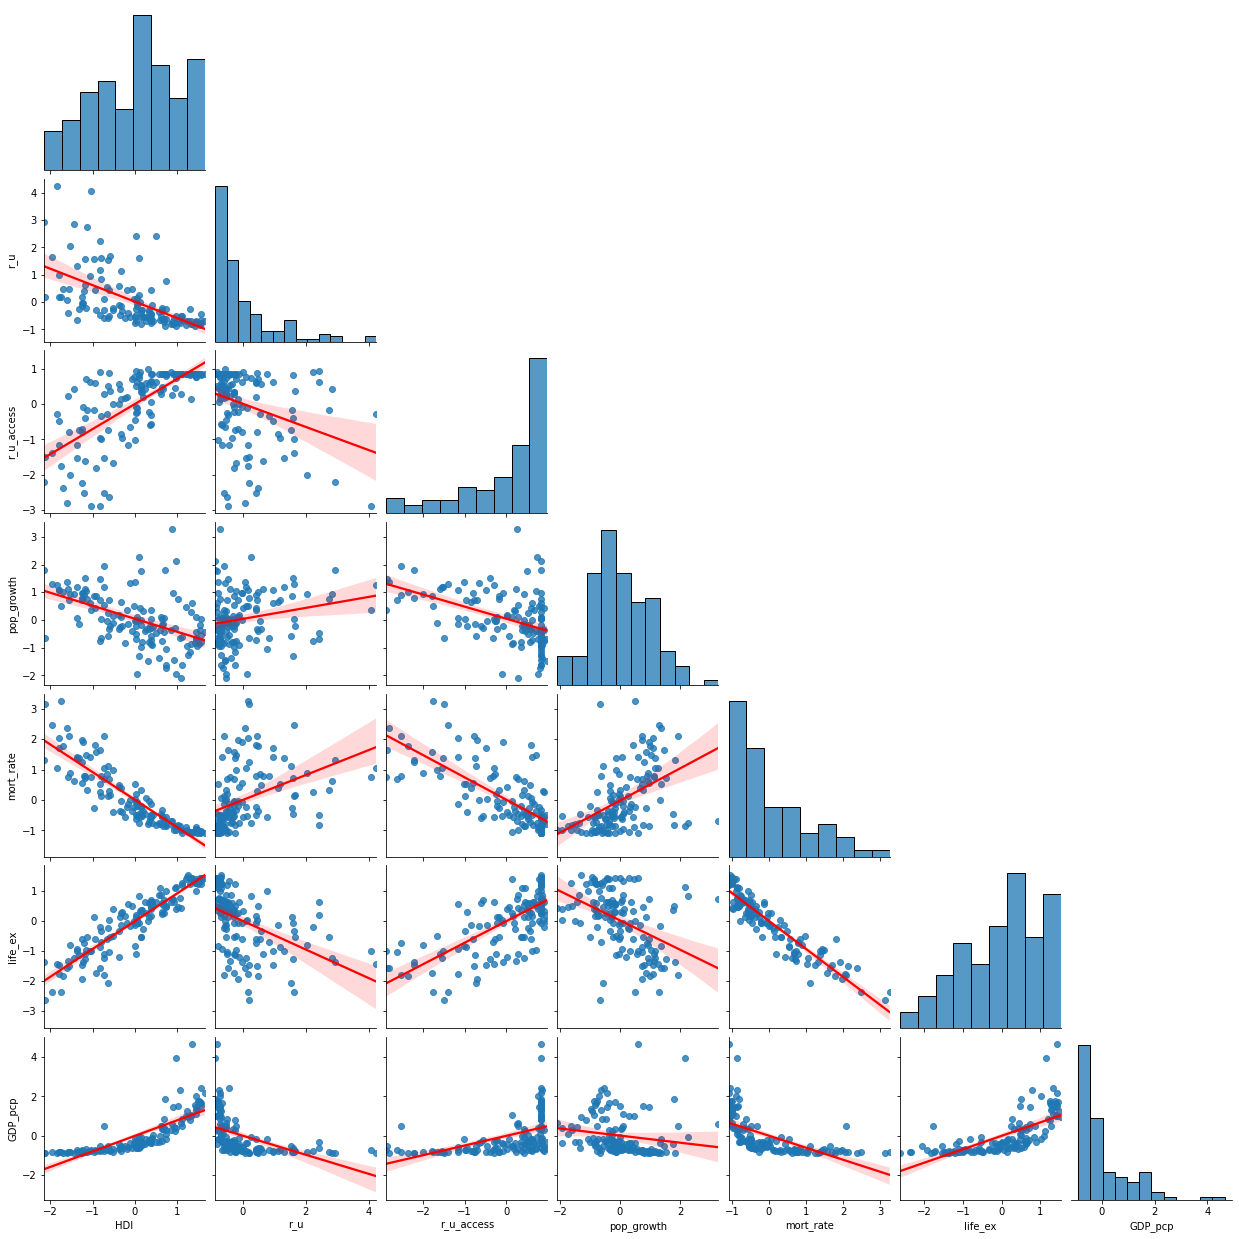

In [24]:
g= sns.pairplot(df_tmp,kind="reg",corner =True, 
             plot_kws={'line_kws':{'color':'red'}})

#### 3.2.2 Hierarchical Clustered Heatmap

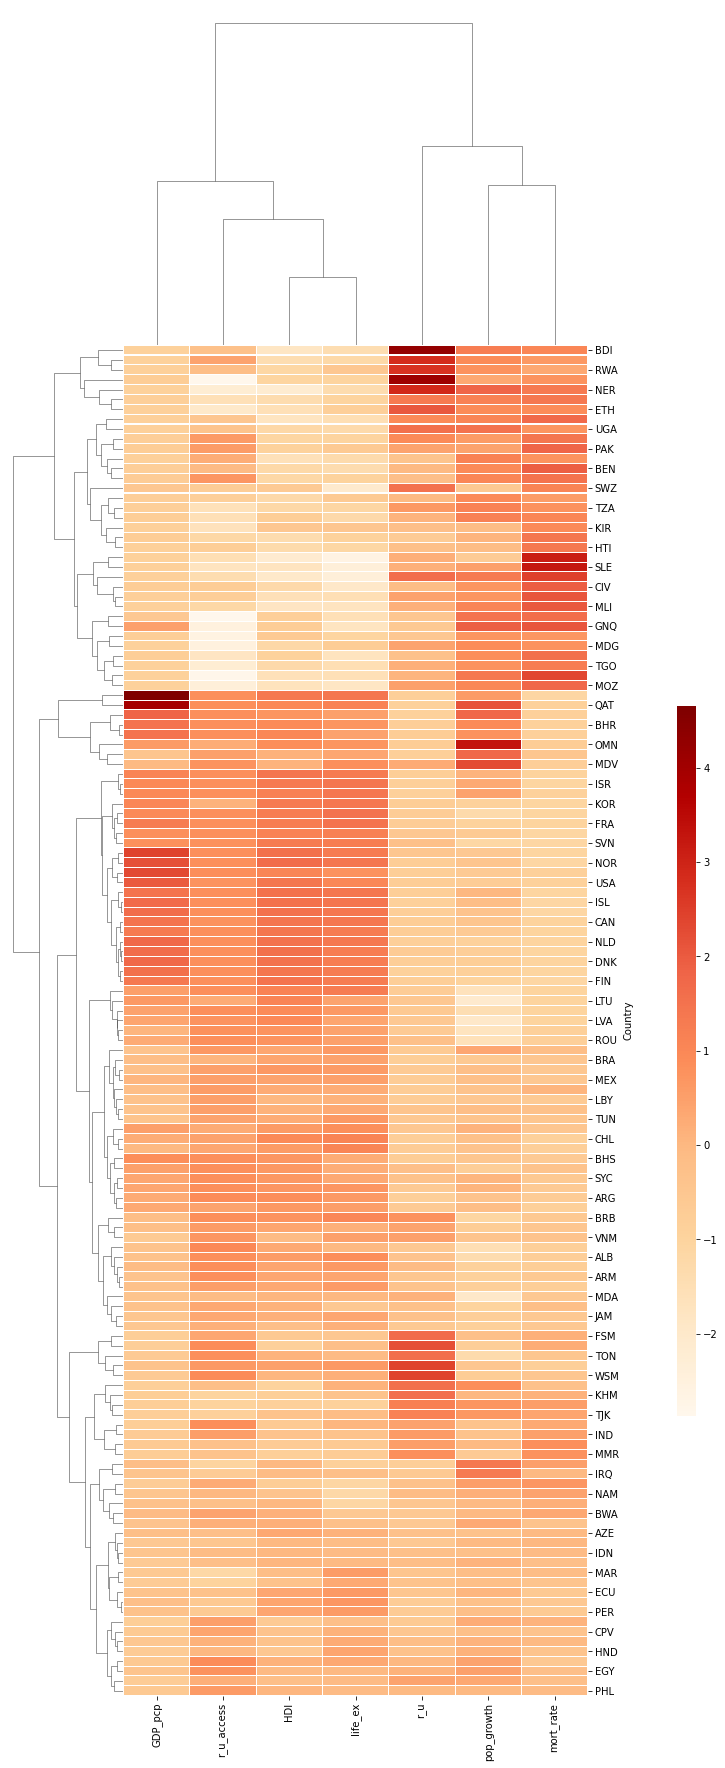

In [27]:
sns.clustermap(df_tmp, 
               linewidth=0.05,
               cmap='OrRd',
               method ='complete',
               figsize=(9,.18*(len(df_tmp.index))),
               cbar_pos=(1.05, .2, .03, .4))

- This clustered heatmap figure helps us identify countries with similar values across all indicators. Thus, countries are re ordered according to their similarity..